In [26]:
import os 
import sys
import re 
import numpy as np
import agilent_loader as ag
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings

folder = "26-12-2022\\Location1"

files_in_folder = [f for f in os.listdir(folder) if '.mi' in f]


for filename in files_in_folder:
	# Generate the new filename by replacing spaces with underscores and removing "@"
	new_filename = filename.replace(" ", "_").replace("@", "")
	
	# Construct the full old and new file paths
	old_file_path = os.path.join(folder, filename)
	new_file_path = os.path.join(folder, new_filename)
	
	# Rename the file
	os.rename(old_file_path, new_file_path)

files_in_folder = [f for f in os.listdir(folder) if '.mi' in f]

print(f" Found {len(files_in_folder)} files in {folder}")
print(files_in_folder)

 Found 501 files in 26-12-2022\Location1
['lls_00000.mi', 'lls_00001.mi', 'lls_00002.mi', 'lls_00003.mi', 'lls_00004.mi', 'lls_00005.mi', 'lls_00006.mi', 'lls_00007.mi', 'lls_00008.mi', 'lls_00009.mi', 'lls_00010.mi', 'lls_00011.mi', 'lls_00012.mi', 'lls_00013.mi', 'lls_00014.mi', 'lls_00015.mi', 'lls_00016.mi', 'lls_00017.mi', 'lls_00018.mi', 'lls_00019.mi', 'lls_00020.mi', 'lls_00021.mi', 'lls_00022.mi', 'lls_00023.mi', 'lls_00024.mi', 'lls_00025.mi', 'lls_00026.mi', 'lls_00027.mi', 'lls_00028.mi', 'lls_00029.mi', 'lls_00030.mi', 'lls_00031.mi', 'lls_00032.mi', 'lls_00033.mi', 'lls_00034.mi', 'lls_00035.mi', 'lls_00036.mi', 'lls_00037.mi', 'lls_00038.mi', 'lls_00039.mi', 'lls_00040.mi', 'lls_00041.mi', 'lls_00042.mi', 'lls_00043.mi', 'lls_00044.mi', 'lls_00045.mi', 'lls_00046.mi', 'lls_00047.mi', 'lls_00048.mi', 'lls_00049.mi', 'lls_00050.mi', 'lls_00051.mi', 'lls_00052.mi', 'lls_00053.mi', 'lls_00054.mi', 'lls_00055.mi', 'lls_00056.mi', 'lls_00057.mi', 'lls_00058.mi', 'lls_00059.mi'

lls_00000.mi


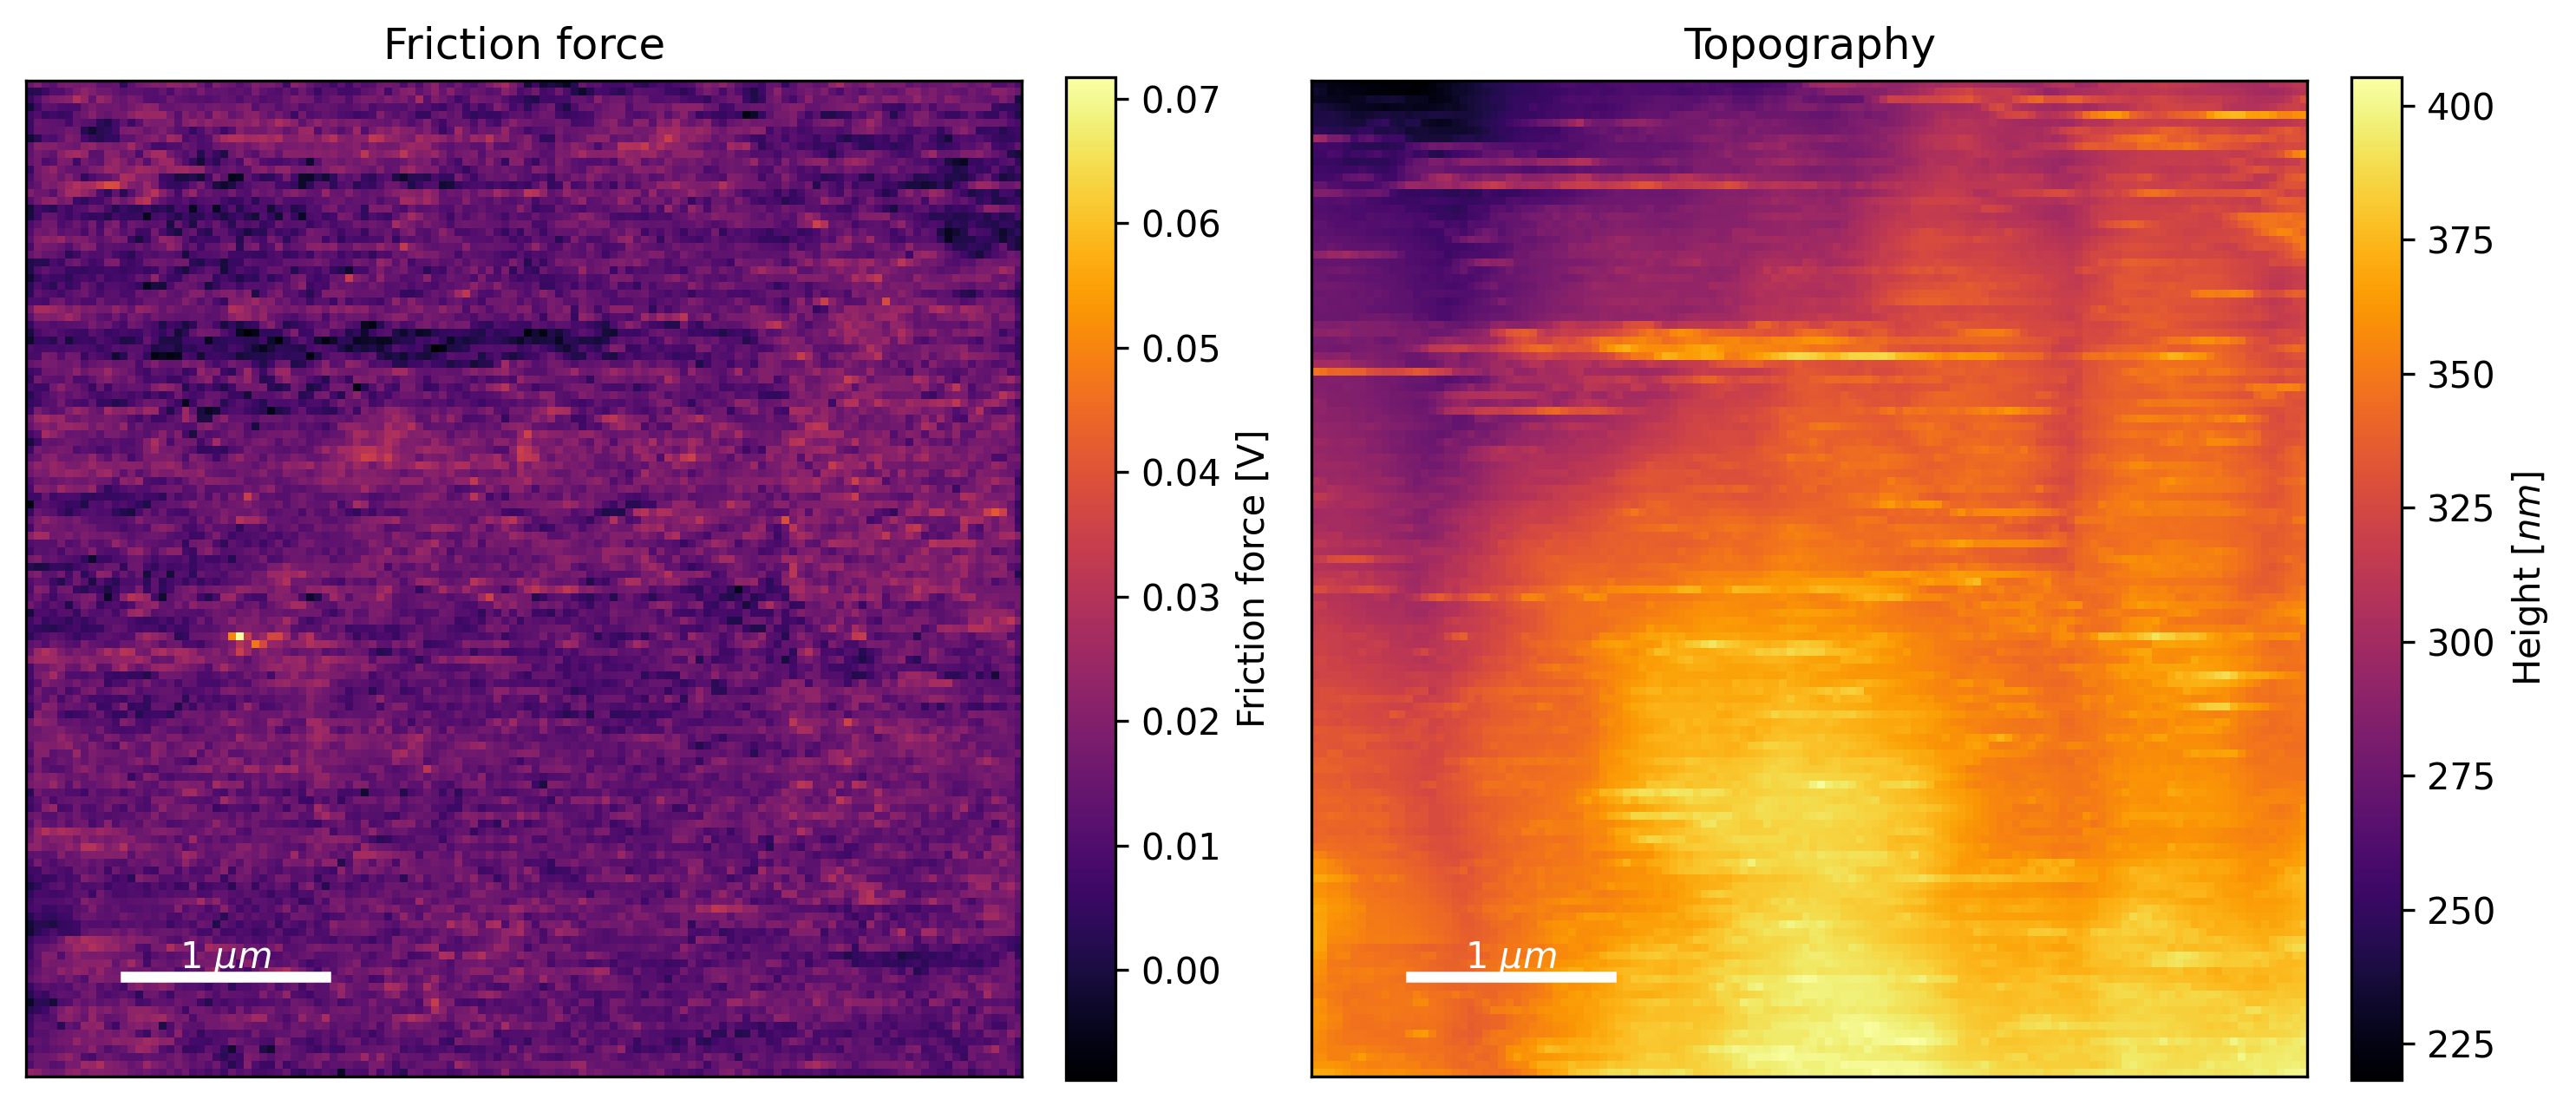

lls_00001.mi
lls_00002.mi
lls_00003.mi
lls_00004.mi
lls_00005.mi
lls_00006.mi
lls_00007.mi
lls_00008.mi
lls_00009.mi
lls_00010.mi
lls_00011.mi
lls_00012.mi
lls_00013.mi
lls_00014.mi
lls_00015.mi
lls_00016.mi
lls_00017.mi
lls_00018.mi
lls_00019.mi
lls_00020.mi
lls_00021.mi
lls_00022.mi
lls_00023.mi
lls_00024.mi
lls_00025.mi
lls_00026.mi
lls_00027.mi
lls_00028.mi
lls_00029.mi
lls_00030.mi
lls_00031.mi
lls_00032.mi
lls_00033.mi
lls_00034.mi
lls_00035.mi
lls_00036.mi
lls_00037.mi
lls_00038.mi
lls_00039.mi
lls_00040.mi
lls_00041.mi
lls_00042.mi
lls_00043.mi
lls_00044.mi
lls_00045.mi
lls_00046.mi
lls_00047.mi
lls_00048.mi
lls_00049.mi
lls_00050.mi
lls_00051.mi
lls_00052.mi
lls_00053.mi
lls_00054.mi
lls_00055.mi
lls_00056.mi
lls_00057.mi
lls_00058.mi
lls_00059.mi
lls_00060.mi
lls_00061.mi
lls_00062.mi
lls_00063.mi
lls_00064.mi
lls_00065.mi
lls_00066.mi
lls_00067.mi
lls_00068.mi
lls_00069.mi
lls_00070.mi
lls_00071.mi
lls_00072.mi
lls_00073.mi
lls_00074.mi
lls_00075.mi
lls_00076.mi
lls_00077.mi

<Figure size 640x480 with 0 Axes>

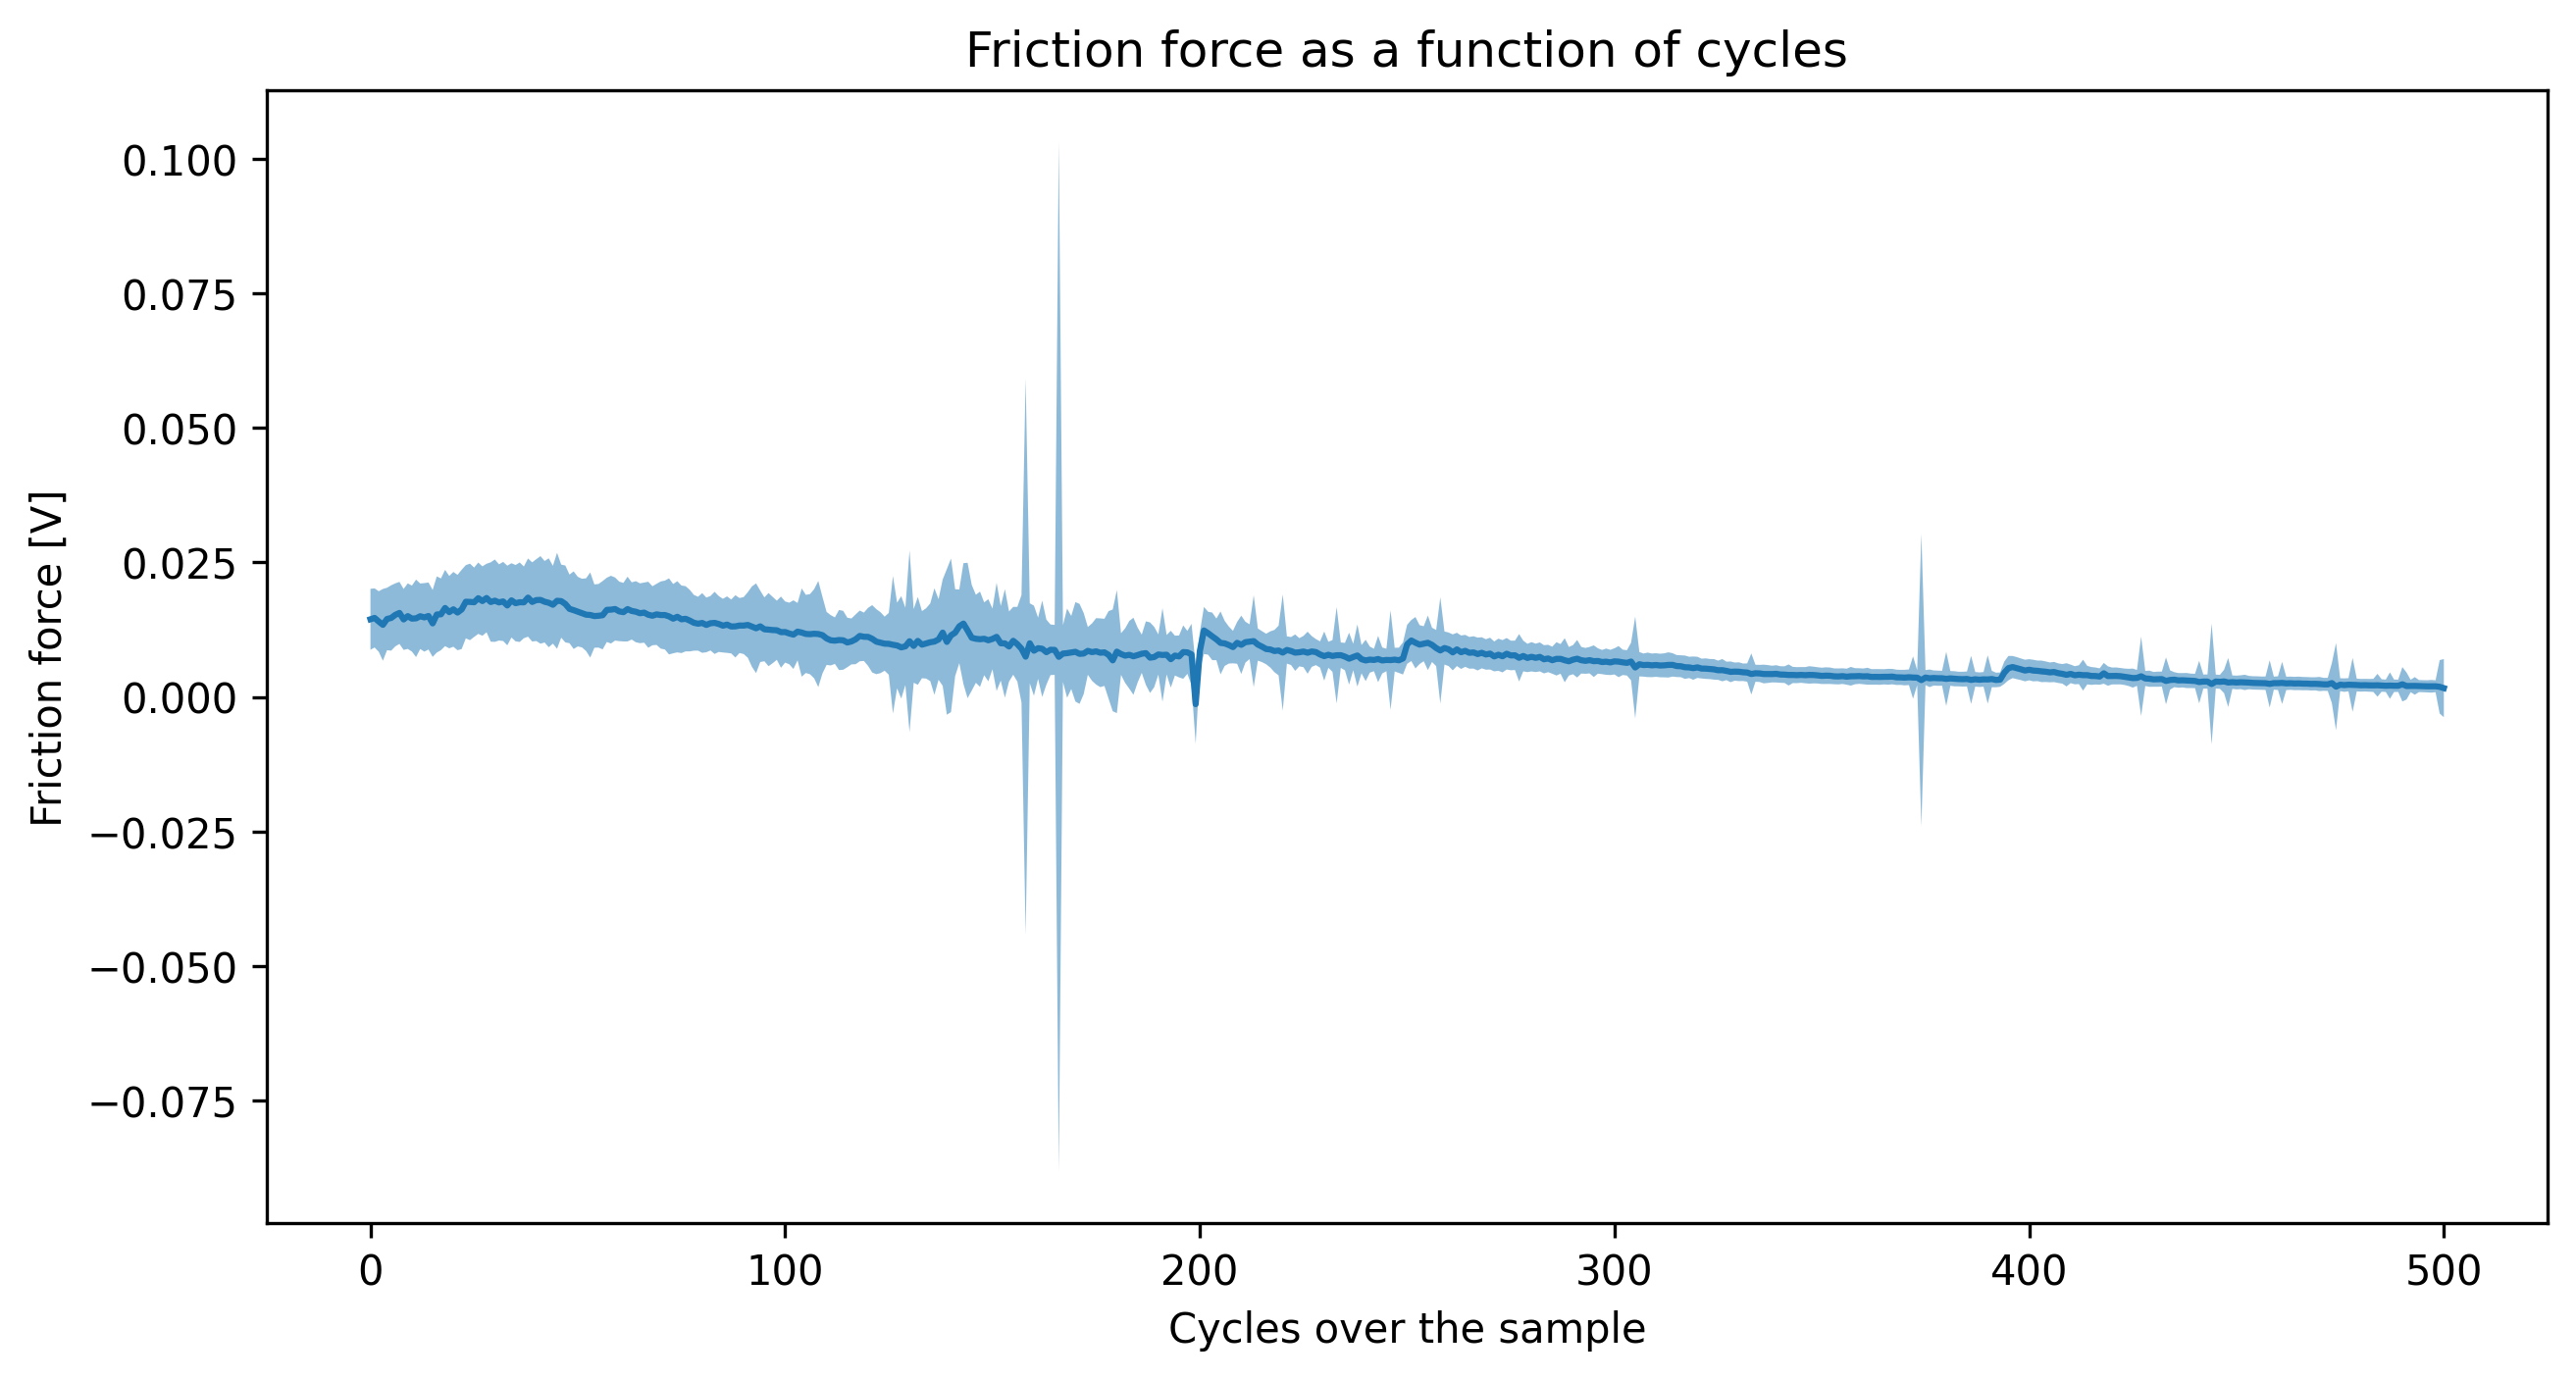

In [69]:
Cof_for_runs=np.zeros(len(files_in_folder))
Cof_for_runs_std=np.zeros(len(files_in_folder))
ii=0


for file_path in files_in_folder:
	
	file=ag.load_mi(folder+"\\"+file_path)	
	friction_arrays=[]
	topography_arrays=[]
	print(file_path)
	for buffer in file.buffers:
		
		if buffer.bufferLabel == "Friction":
			friction_arrays.append(buffer.data)
		elif buffer.bufferLabel == "Topography":
			topography_arrays.append(buffer.data)
			
	if len(friction_arrays) == 2:
		averaged_friction = ((friction_arrays[1]) - (friction_arrays[0])) / 2

		friction_std=np.std(averaged_friction)
		friction_mean=np.mean(averaged_friction)
		Cof_for_runs[ii]=friction_mean
		Cof_for_runs_std[ii]=friction_std

	else:
		warnings.warn(f"{file_path} doesnt contain both trace and retrace friction chunks\nExpected 2 friction arrays, got %d" % len(friction_arrays)+f" with file {file_path}")
		# raise ValueError("Expected 2 friction arrays, got %d" % len(friction_arrays)+f" with file {file_path} ")
		continue

	if (ii==0):
		fig,ax=plt.subplots(1,2,figsize=(10,5),dpi=300)
		file.extent=file.extent*1e6
		# print(f"extent {file.extent}")
		file.extent[1]=file.extent[1]-file.extent[0]
		file.extent[0]=0
		file.extent[3]=file.extent[3]-file.extent[2]
		file.extent[2]=0
		# print(f"extent {file.extent}")
		im1=ax[0].imshow(averaged_friction,cmap='inferno', extent=file.extent)
		im2=ax[1].imshow(topography_arrays[0]*1e9,cmap='inferno', extent=file.extent)
		ax[0].set_title(file_path+" friction force")


		ax[0].set_title("Friction force")
		ax[1].set_title("Topography")
		ax[0].set_xticks([])
		ax[0].set_yticks([])
		ax[1].set_xticks([])
		ax[1].set_yticks([])


		scale_length_um = 1
		x_pad=0.1
		y_pad=0.1
		x_low=file.extent[1]*x_pad
		y_low=file.extent[3]*y_pad
	
		scale_bar1 = Line2D([x_low, x_low+ scale_length_um], [y_low,y_low], color='white', linewidth=3)
		scale_bar2 = Line2D([x_low, x_low+ scale_length_um], [y_low,y_low], color='white', linewidth=3)
		
		
		ax[0].add_line(scale_bar1)
		ax[0].text(x_low+ scale_length_um/2, y_low, f'{scale_length_um} $\mu m$', color='white', ha='center', va='bottom')
		ax[1].add_line(scale_bar2)
		ax[1].text(x_low+ scale_length_um/2, y_low, f'{scale_length_um} $\mu m$', color='white', ha='center', va='bottom')

		cbar1=fig.colorbar(im1,ax=ax[0],fraction=0.046, pad=0.04)
		cbar2=fig.colorbar(im2,ax=ax[1],fraction=0.046, pad=0.04)
		cbar1.set_label("Friction force [V]")
		cbar2.set_label("Height $[ nm]$")

		plt.tight_layout(rect=[0, 0, 1, 0.95])
		plt.show()
		plt.clf()

	ii+=1


plt.figure(figsize=(10,5),dpi=300)
plt.plot(np.arange(len(Cof_for_runs)),Cof_for_runs)	
plt.fill_between(np.arange(len(Cof_for_runs)),Cof_for_runs-Cof_for_runs_std,Cof_for_runs+Cof_for_runs_std,alpha=0.5)
plt.title("Friction force as a function of cycles")
plt.xlabel("Cycles over the sample")
plt.ylabel("Friction force [V]")
plt.savefig(folder+"\\Friction_force_for_cycles.png")


# plt.xlim(len(Cof_for_runs)/5,len(Cof_for_runs)/4)
# plt.ylim(2,4)

